In [145]:
import pandas as pd
import glob
csv_files=glob.glob("*.csv")
csv_files

['hassan_3_0.csv', 'hassan_7_0.csv', 'hassan_31_0.csv', 'hassan_6_0.csv']

In [146]:
dataframes=[]
for i in csv_files:
    a=pd.read_csv(i)
    dataframes.append(a)
df1=dataframes[0]
df2=dataframes[1]
df3=dataframes[2]  

In [147]:
df1['Activity']='Manual Digging'
df2['Activity']='Machine Digging' 
df3['Activity']='Vehicle Movement'

In [148]:
print(df1.shape,
df2.shape,
df3.shape)

(891, 16797) (813, 16797) (786, 16797)


In [149]:
def process_df(df):
    df['time']=pd.to_datetime(df['time'])
    df.set_index(df['time'],inplace=True)
    min_time=df.index.min()
    max_time=df.index.max()
    time=pd.date_range(start=min_time,end=max_time,freq="100mS")
    df_new=df.reindex(time).interpolate(method='linear')
    df_new['Activity']=df_new['Activity'].ffill()
    df_new.reset_index(inplace=True)
    df_new=df_new.drop('time',axis=1)
    return df_new        

In [150]:
df1_new=process_df(df1)
df2_new=process_df(df2)
df3_new=process_df(df3)

/tmp/ipykernel_7880/3818765594.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_new=df.reindex(time).interpolate(method='linear')
/tmp/ipykernel_7880/3818765594.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_new=df.reindex(time).interpolate(method='linear')
/tmp/ipykernel_7880/3818765594.py:7: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df_new=df.reindex(time).interpolate(method='linear')


In [151]:
df1_new

,index,0,1,2,3,4,5,6,7,8,...,16786,16787,16788,16789,16790,16791,16792,16793,channel,Activity
0,2020-08-25 06:03:16.686,0.337385,0.729196,0.729226,0.710262,0.286994,0.420836,0.743512,0.759112,0.793417,...,0.304415,0.432611,0.432052,0.489265,0.360385,0.404551,0.422866,0.367906,1.0,Manual Digging
1,2020-08-25 06:03:16.786,0.336636,0.725090,0.725499,0.706837,0.287469,0.419377,0.739621,0.754983,0.788694,...,0.304779,0.432048,0.431359,0.487939,0.360470,0.403659,0.421867,0.367416,1.0,Manual Digging
2,2020-08-25 06:03:16.886,0.335887,0.720984,0.721772,0.703411,0.287944,0.417917,0.735731,0.750854,0.783970,...,0.305144,0.431486,0.430666,0.486612,0.360555,0.402767,0.420868,0.366927,1.0,Manual Digging
3,2020-08-25 06:03:16.986,0.335138,0.716878,0.718045,0.699986,0.288419,0.416458,0.731840,0.746725,0.779247,...,0.305508,0.430923,0.429972,0.485286,0.360640,0.401875,0.419869,0.366438,1.0,Manual Digging
4,2020-08-25 06:03:17.086,0.334389,0.712772,0.714317,0.696561,0.288893,0.414998,0.727949,0.742596,0.774524,...,0.305873,0.430361,0.429279,0.483960,0.360725,0.400983,0.418870,0.365948,1.0,Manual Digging
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2135,2020-08-25 06:06:50.186,34.722958,36.791195,32.885025,13.895889,13.275629,14.065315,12.656234,4.921365,2.658146,...,0.256697,0.223562,0.222845,0.340183,0.222336,0.224337,0.247321,0.264735,1.0,Manual Digging
2136,2020-08-25 06:06:50.286,34.722958,36.791195,32.885025,13.895889,13.275629,14.065315,12.656234,4.921365,2.658146,...,0.256697,0.223562,0.222845,0.340183,0.222336,0.224337,0.247321,0.264735,1.0,Manual Digging
2137,2020-08-25 06:06:50.386,34.722958,36.791195,32.885025,13.895889,13.275629,14.065315,12.656234,4.921365,2.658146,...,0.256697,0.223562,0.222845,0.340183,0.222336,0.224337,0.247321,0.264735,1.0,Manual Digging
2138,2020-08-25 06:06:50.486,34.722958,36.791195,32.885025,13.895889,13.275629,14.065315,12.656234,4.921365,2.658146,...,0.256697,0.223562,0.222845,0.340183,0.222336,0.224337,0.247321,0.264735,1.0,Manual Digging


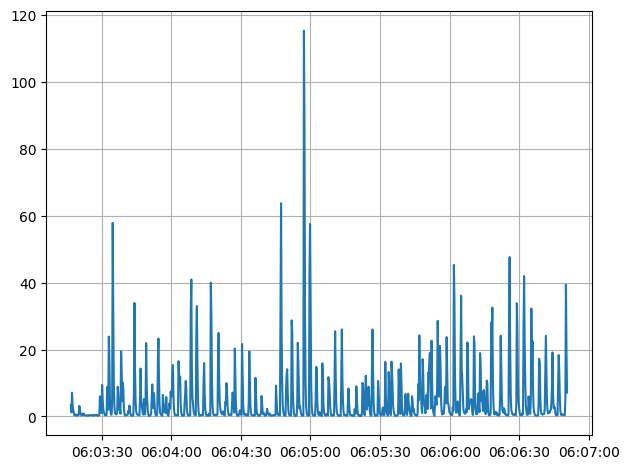

In [152]:
#Manual Digging (142:154)
import matplotlib.pyplot as plt
md=df1_new.iloc[:,142:154]
bmd=df1[['150']]
plt.plot(bmd)
plt.tight_layout()
plt.grid()
plt.show()


In [153]:
dataframes_1 = []
chunk_size = 100  
for start in range(0, len(md), chunk_size):
    end = start + chunk_size
    chunk = md.iloc[start:end, :-3].transpose()  
    chunk.columns = range(1, chunk.shape[1] + 1)
    dataframes_1.append(chunk)
final_df_1 = pd.concat(dataframes_1, ignore_index=True)
final_df_1['activity']='Manual Digging'

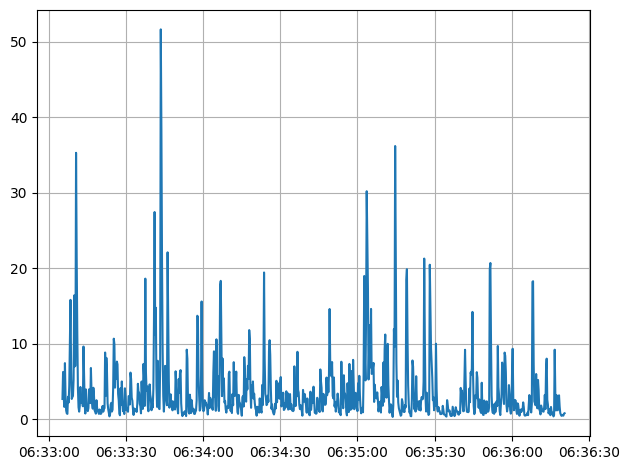

In [154]:
#Machine Digging (66:147)
machid=df2_new.iloc[:,66:147]
bmachid=df2['80']
plt.plot(bmachid)
plt.tight_layout()
plt.grid()
plt.show()
# bmachid.plot()

In [155]:
dataframes_2 = []
chunk_size = 100  
for start in range(0, len(machid), chunk_size):
    end = start + chunk_size
    chunk = machid.iloc[start:end, :-3].transpose()  
    chunk.columns = range(1, chunk.shape[1] + 1)
    dataframes_2.append(chunk)
final_df_2 = pd.concat(dataframes_2, ignore_index=True)
final_df_2['activity']='Machine Digging'

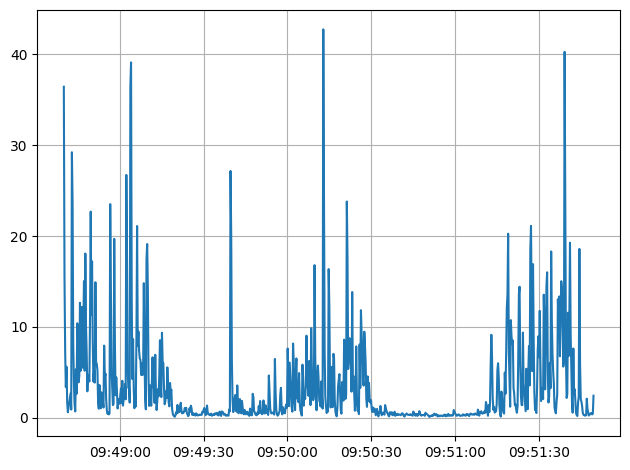

In [156]:
#vehicle movement (44:90)
vm=df3_new.iloc[:,44:90]
#vm['activity']='vehicle movement'
bvm=df3['84']
plt.plot(bvm)
plt.tight_layout()
plt.grid()
plt.show()
# bvm.plot()

In [157]:
dataframes_3 = []
chunk_size = 100  
for start in range(0, len(vm), chunk_size):
    end = start + chunk_size
    chunk = vm.iloc[start:end, :-3].transpose()  
    chunk.columns = range(1, chunk.shape[1] + 1)
    dataframes_3.append(chunk)
final_df_3 = pd.concat(dataframes_3, ignore_index=True)
final_df_3['activity']='Vehicle Movement'

In [158]:
final_df_1['activity']='Manual Digging'
final_df_2['activity']='Machine Digging'
final_df_3['activity']='Vehicle Movement'

In [172]:
df=pd.concat([final_df_1,final_df_2,final_df_3],ignore_index=True)
df=df.interpolate()
df=df.sample(frac=1).reset_index(drop=True)
#df.dropna(inplace=True)
df.head()

/tmp/ipykernel_7880/3988109042.py:2: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df=df.interpolate()


,1,2,3,4,5,6,7,8,9,10,...,92,93,94,95,96,97,98,99,100,activity
0,12.100806,12.097190,12.093573,12.089957,12.086340,12.082724,12.079108,12.075491,12.071875,12.068258,...,11.771712,11.768095,11.764479,11.760863,11.757246,11.753630,11.750013,11.746397,11.742780,Machine Digging
1,21.223901,21.320222,21.416543,21.512864,21.609186,21.705507,21.801828,21.898149,21.994470,22.090791,...,8.493713,8.317941,8.142168,7.966395,7.790623,7.614850,7.439077,7.263305,7.087532,Machine Digging
2,0.384895,0.384895,0.384895,0.384895,0.384895,0.384895,0.384895,0.384895,0.384895,0.384895,...,0.384895,0.384895,0.384895,0.384895,0.256732,0.256732,0.256732,0.256732,0.256732,Vehicle Movement
3,3.266421,3.273260,3.280099,3.286938,3.293777,3.300616,3.307455,3.314294,3.321133,3.327972,...,3.888770,3.895609,3.902448,3.909287,3.916126,3.922965,3.929804,3.936643,3.943482,Vehicle Movement
4,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,...,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,11.987338,Machine Digging


In [161]:
X=df.iloc[:,:100]
y=df.iloc[:,-1]

In [162]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X=scaler.fit_transform(X)

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [164]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(max_iter=1000)
model=lr.fit(X_train,y_train)
model

LogisticRegression(max_iter=1000)

In [165]:
y_pred=model.predict(X_test)
y_pred

array(['Vehicle Movement', 'Machine Digging', 'Machine Digging',
       'Machine Digging', 'Vehicle Movement', 'Vehicle Movement',
       'Machine Digging', 'Machine Digging', 'Machine Digging',
       'Machine Digging', 'Machine Digging', 'Machine Digging',
       'Machine Digging', 'Machine Digging', 'Machine Digging',
       'Vehicle Movement', 'Vehicle Movement', 'Machine Digging',
       'Vehicle Movement', 'Vehicle Movement', 'Machine Digging',
       'Machine Digging', 'Vehicle Movement', 'Machine Digging',
       'Vehicle Movement', 'Vehicle Movement', 'Vehicle Movement',
       'Machine Digging', 'Machine Digging', 'Vehicle Movement',
       'Machine Digging', 'Machine Digging', 'Machine Digging',
       'Machine Digging', 'Vehicle Movement', 'Machine Digging',
       'Vehicle Movement', 'Machine Digging', 'Machine Digging',
       'Machine Digging', 'Machine Digging', 'Machine Digging',
       'Vehicle Movement', 'Vehicle Movement', 'Machine Digging',
       'Machine Digging'

In [166]:
from sklearn.metrics import accuracy_score,classification_report
print("accuracy score",accuracy_score(y_test,y_pred))
#print(classification_report(y_test,y_pred))

accuracy score 0.6757281553398058


In [167]:
new_data=df.iloc[20:21,:-1]
new_data

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
20,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,...,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031,8.635031


In [168]:
test=df.iloc[99:100,:-1]
test

,1,2,3,4,5,6,7,8,9,10,...,91,92,93,94,95,96,97,98,99,100
99,13.45341,13.435858,13.418307,13.400755,13.383204,13.365652,13.3481,13.330549,13.312997,13.295446,...,11.873771,11.856219,11.838668,11.821116,11.803564,11.786013,11.768461,11.75091,11.733358,11.715807


In [169]:
pred_new=model.predict(new_data)
pred_new[0]

'Machine Digging'